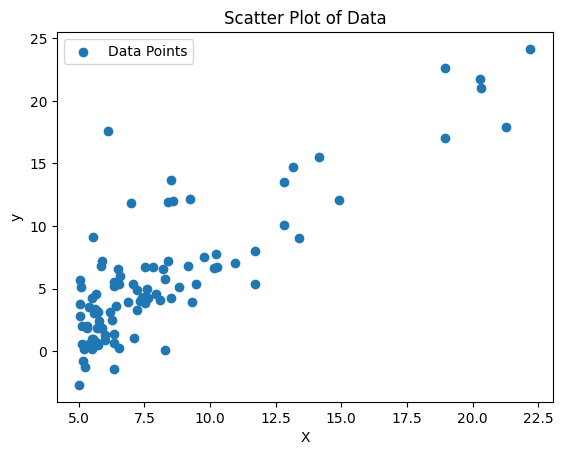

Coefficients using Normal Equation: w0 = -3.8957808783118772, w1 = 1.1930336441895957


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = np.loadtxt('data2.txt', delimiter=',')
X = data[:, 0]
y = data[:, 1]

# Plot the data
plt.scatter(X, y, marker='o', label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot of Data')
plt.legend()
plt.show()

# Add a bias term (intercept) to X
X_bias = np.vstack((np.ones_like(X), X)).T

# Calculate coefficients using the Normal Equation
coefficients_normal = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y

w0_normal, w1_normal = coefficients_normal
print(f'Coefficients using Normal Equation: w0 = {w0_normal}, w1 = {w1_normal}')

# Split the data into training (80%) and testing (20%)
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]



### Batch GD tends to converge to a more accurate solution compared to stochastic GD. This is because it computes gradients using the entire training dataset at each iteration, resulting in a more stable and precise estimate of the gradient. Therefore, it often leads to a better final model in terms of testing set accuracy.

In [24]:
# Define the Gradient Descent function
def batch_gradient_descent(X, y, learning_rate, num_iterations, threshold=1e-6):
    w = np.zeros(X.shape[1])  # Initialize coefficients w to zeros
    mse_history = []
    prev_mse = float('inf')

    for iteration in range(num_iterations):
        # Calculate predictions
        predictions = X.dot(w)

        # Calculate the error
        error = predictions - y

        # Calculate gradients
        gradient = X.T.dot(error) / len(y)

        # Update coefficients
        w -= learning_rate * gradient

        # Calculate Mean Squared Error (MSE)
        mse = np.mean((error ** 2))
        mse_history.append(mse)

        # Check for convergence
        if abs(prev_mse - mse) < threshold:
            break

        prev_mse = mse

    return w, mse_history


### Stochastic GD, on the other hand, updates the model's parameters using only one randomly chosen data point per iteration. While this introduces more noise into the gradient estimate, it can escape local minima and explore the parameter space more diversely. However, this stochasticity can make the optimization path less consistent, leading to slightly less accurate models compared to batch GD.

In [26]:
def stochastic_gradient_descent(X, y, learning_rate, num_iterations, threshold=1e-6):
    w = np.zeros(X.shape[1])  # Initialize coefficients w to zeros
    mse_history = []
    prev_mse = float('inf')

    for iteration in range(num_iterations):
        for i in range(len(y)):
            # Randomly select a single data point
            random_index = np.random.randint(0, len(y))
            x_i = X[random_index, :]
            y_i = y[random_index]

            # Calculate prediction for the selected data point
            prediction = np.dot(w, x_i)

            # Calculate the error for the selected data point
            error = prediction - y_i

            # Update coefficients for the selected data point
            w -= learning_rate * error * x_i

        # Calculate Mean Squared Error (MSE) for the entire dataset
        predictions = X.dot(w)
        mse = np.mean((predictions - y) ** 2)
        mse_history.append(mse)

        # Check for convergence
        if abs(prev_mse - mse) < threshold:
            break

        prev_mse = mse

    return w, mse_history

### Stochastic Gradient Descent: Stochastic Gradient Descent can also use the same threshold-based termination condition, but it is often observed that it may terminate earlier due to rapid progress in the early iterations.

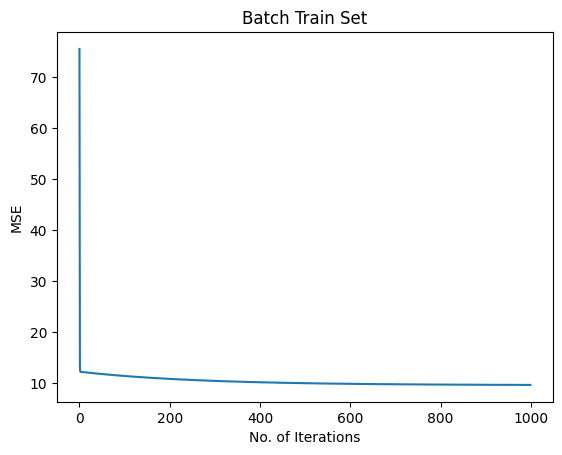

In [43]:
# plot Batch Train Set

_, batch_train_mse = batch_gradient_descent(X_train_bias, y_train, learning_rate, num_iterations)
_, batch_test_mse = batch_gradient_descent(X_test_bias, y_test, learning_rate, num_iterations)
plt.xlabel('No. of Iterations')
plt.ylabel('MSE')
plt.title('Batch Train Set')
plt.plot(range(1000),batch_train_mse)

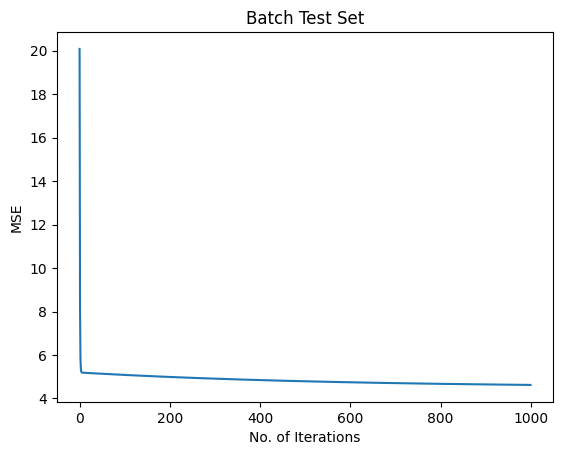

In [44]:
# plot Batch Test Set
plt.xlabel('No. of Iterations')
plt.ylabel('MSE')
plt.title('Batch Test Set')
plt.plot(range(1000),batch_test_mse)

In [36]:
_, sto_mse = stochastic_gradient_descent(X_train_bias, y_train, learning_rate, num_iterations)
_, stotest_mse = stochastic_gradient_descent(X_test_bias, y_test, learning_rate, num_iterations)

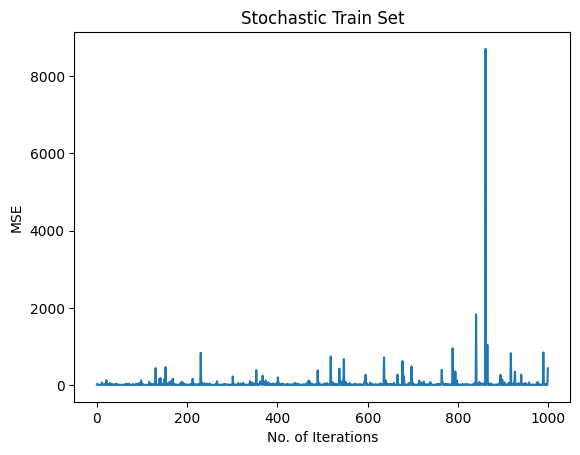

In [45]:
# plot Stochastic Train Set
plt.xlabel('No. of Iterations')
plt.ylabel('MSE')
plt.title('Stochastic Train Set')
plt.plot(range(1000),sto_mse)

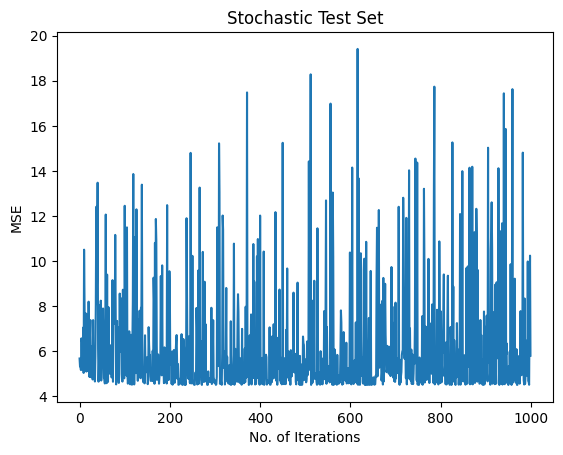

In [46]:
# plot Stochastic Test Set
plt.xlabel('No. of Iterations')
plt.ylabel('MSE')
plt.title('Stochastic Test Set')
plt.plot(range(1000),stotest_mse)

Best learning rate: 0.01


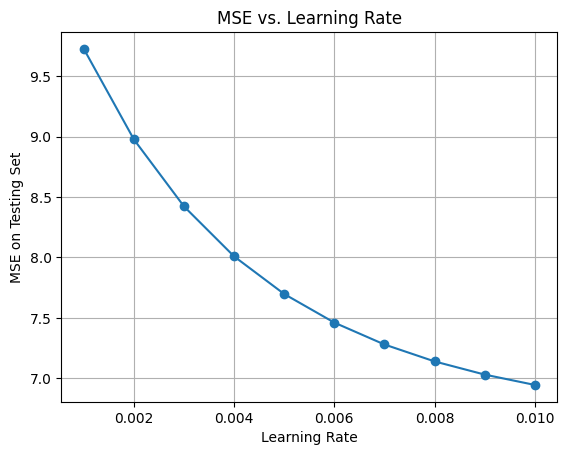

In [25]:
# Set hyperparameters
learning_rates = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
num_iterations = 1000

mse_training_history = []
mse_testing_history = []

# Perform Gradient Descent for each learning rate
for learning_rate in learning_rates:
    X_train_bias = np.vstack((np.ones_like(X_train), X_train)).T  # Add bias to training set
    # Perform Gradient Descent on the training set
    w_gd, mse_history = gradient_descent(X_train_bias, y_train, learning_rate, num_iterations)
    mse_training_history.append(mse_history[-1])  # Final MSE for training set

    # Calculate predictions on the testing set
    X_test_bias = np.vstack((np.ones_like(X_test), X_test)).T  # Add bias to testing set
    predictions_test = X_test_bias.dot(w_gd)

    # Calculate MSE on the testing set
    mse_testing = np.mean((predictions_test - y_test) ** 2)
    mse_testing_history.append(mse_testing)

# Find the best learning rate
best_learning_rate_index = np.argmin(mse_testing_history)
best_learning_rate = learning_rates[best_learning_rate_index]
print(f'Best learning rate: {best_learning_rate}')

# Plot MSE vs. learning rate
plt.plot(learning_rates, mse_testing_history, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('MSE on Testing Set')
plt.title('MSE vs. Learning Rate')
plt.grid()
plt.show()


### Batch Gradient Descent: Typically, batch Gradient Descent uses a threshold-based termination condition where the optimization process stops when the change in the cost function (e.g., MSE) between consecutive iterations falls below a predefined threshold. This ensures that the optimization process continues until a high level of accuracy is achieved.

